#Probelm Statement:

1.   Identify patterns/trends in the data?
2.   Which AC was used the most/least?

##Optional (Bonus questions):

1.   Relate this power data with the outside temperature of Gurgaon. (Feel free to use temperature data from any website online. How will you fetch that data in your analysis?
2.   Using the power data, predict/forecast the power consumption?


###Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


###Loading `AC_Data.csv`

In [3]:
ac_data = pd.read_csv('drive/My Drive/zenatix/AC_Data.csv',parse_dates=['0'],index_col='0')
ac_data.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [4]:
ac_data.shape

(87840, 18)

####Checking for Null values in data

In [5]:
ac_data.isnull().sum()

AC 1     44132
AC 2     44129
AC 3     44127
AC 4     44136
AC 5     44124
AC 6     44123
AC 7     44161
AC 8     44136
AC 9     44186
AC 10    44150
AC 11    44170
AC 12    44127
AC 13    44121
AC 14    44144
AC 15    44125
AC 16    44130
AC 17    44126
AC 18    44117
dtype: int64

####Handling `NULL` values

In [6]:
ac_data = ac_data.ffill()

In [7]:
ac_data.isnull().sum()

AC 1     0
AC 2     0
AC 3     0
AC 4     0
AC 5     0
AC 6     0
AC 7     0
AC 8     0
AC 9     0
AC 10    0
AC 11    0
AC 12    0
AC 13    0
AC 14    0
AC 15    0
AC 16    0
AC 17    0
AC 18    0
dtype: int64

In [8]:
ac_data = ac_data.rename_axis(index='Date')

In [9]:
ac_data.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2019-08-01 00:01:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
2019-08-01 00:03:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


###Resampling the data to `1H` for having overview

In [10]:
ac_data = ac_data.resample('1H').sum()
ac_data.head(2)

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,410.490427,510.102173,108.111329,58.511158,133.920434,258.178644,160.640428,289.550405,219.168396,153.359902,99.124138,120.936723,281.534065,311.959529,339.111973,254.645117,157.961703,310.350329
2019-08-01 01:00:00,444.461039,507.544486,89.407868,110.532417,134.200592,258.884910,156.616814,267.793636,183.223262,159.536741,81.991925,113.235126,306.522638,341.941835,356.537636,276.733539,154.812813,238.258716


In [11]:
ac_total_power = pd.DataFrame(ac_data.sum().values, index=ac_data.sum().index, columns=['Total AC Power'])

In [12]:
ac_total_power

,Total AC Power
AC 1,208686.631318
AC 2,339543.784946
AC 3,225575.318697
AC 4,210198.437956
AC 5,124875.693117
AC 6,221016.209546
AC 7,261652.708235
AC 8,223835.483890
AC 9,279313.856254
AC 10,135022.551342


####Plotting Total Power usage by each AC

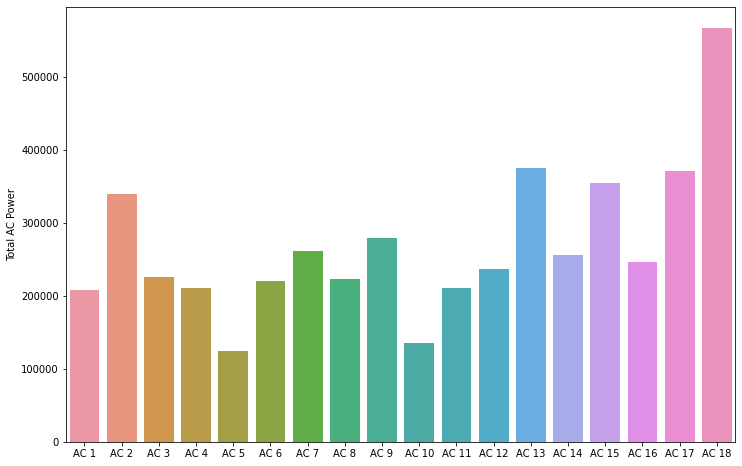

In [13]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=ac_total_power.index,y=ac_total_power['Total AC Power'],data=ac_total_power,ax=ax)

###Observations#

1.   AC 18 is using maximum power which is 567739.75
2.   AC 5 is using minimum power which is 124875.69



###Generating new attributes for more analysis

In [14]:
ac_data['Total Power'] = ac_data.sum(axis=1)
ac_data['Time'] = ac_data.index.time
ac_data['Date'] = ac_data.index.date
ac_data['WeekDay'] = ac_data.index.day_name()

In [15]:
ac_data.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Total Power,Time,Date,WeekDay
Date,,,,,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,410.490427,510.102173,108.111329,58.511158,133.920434,258.178644,160.640428,289.550405,219.168396,153.359902,99.124138,120.936723,281.534065,311.959529,339.111973,254.645117,157.961703,310.350329,4177.656874,00:00:00,2019-08-01,Thursday
2019-08-01 01:00:00,444.461039,507.544486,89.407868,110.532417,134.200592,258.884910,156.616814,267.793636,183.223262,159.536741,81.991925,113.235126,306.522638,341.941835,356.537636,276.733539,154.812813,238.258716,4182.235992,01:00:00,2019-08-01,Thursday
2019-08-01 02:00:00,441.053079,486.794757,88.939379,87.923410,119.480760,252.972261,165.183672,228.082479,186.937339,168.197922,91.696864,115.198590,242.076595,301.364912,372.839316,316.030024,164.095701,236.996036,4065.863094,02:00:00,2019-08-01,Thursday
2019-08-01 03:00:00,398.356839,475.398753,134.292391,86.440637,125.462891,284.090065,182.687065,233.741794,170.691838,163.910157,67.305471,100.259206,264.031076,302.066759,296.158609,300.090155,254.321862,233.897192,4073.202759,03:00:00,2019-08-01,Thursday
2019-08-01 04:00:00,395.859189,438.054008,104.699482,152.879013,112.328594,216.035988,175.111916,226.125217,202.991240,155.859458,72.398354,110.208183,238.372007,256.997169,319.407776,288.714979,251.520520,236.265118,3953.828214,04:00:00,2019-08-01,Thursday


###Observing Day-wise analysis


1.   Thursday seems to be the day of highest usage (maybe more family functions or corporate meetings)
2.   Weekends are amaong the lowest consumption group
3.May be this hotel is hosting many corporate meetings therefore the weekends observe less consumption.


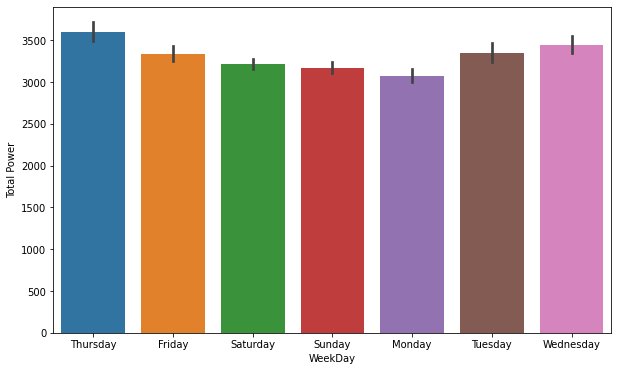

In [16]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=ac_data['WeekDay'],y=ac_data['Total Power'],data=ac_data,ax=ax)

###Observing Time based usage of power


1.   More usage is observed during `9 pm - 6 am` (maybe due to continous usage of ac during night while sleeping) 
2.   This trend is common amaong hotels so nothing unusual



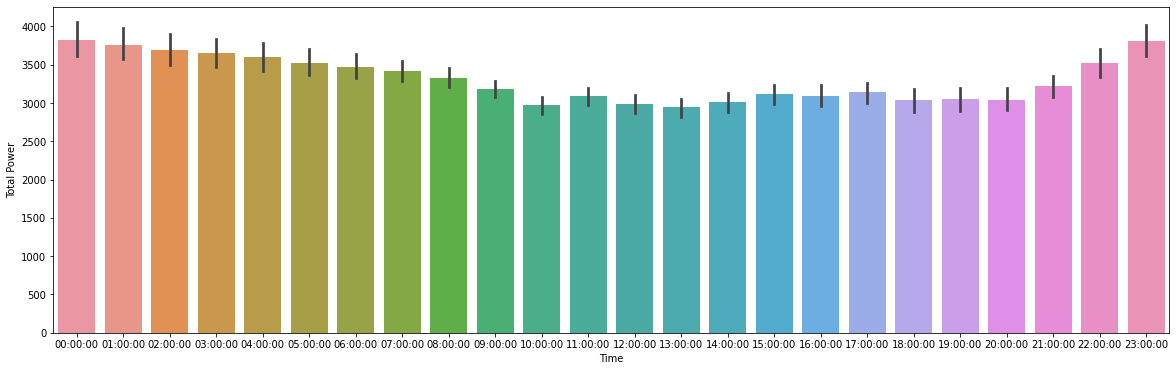

In [17]:
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=ac_data['Time'],y=ac_data['Total Power'],data=ac_data,ax=ax)

###Loading Gurgaon daily Temperature data

In [18]:
gurgaon_data = pd.read_csv('drive/My Drive/zenatix/gurgaon.csv',index_col='date_time')
gurgaon_data.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
date_time,,,,,,,,,,,,,,,,,,,,,,,,
2019-08-01,36,30,0.0,13.7,8,0,05:37 AM,07:38 PM,05:44 AM,07:13 PM,22,39,39,34,14,33,52,2.4,998,36,10,112,11,gurgaon
2019-08-02,38,32,0.0,13.7,8,5,06:46 AM,08:27 PM,05:44 AM,07:12 PM,22,40,40,35,12,31,49,2.8,996,38,9,114,9,gurgaon
2019-08-03,38,32,0.0,13.7,8,12,07:56 AM,09:12 PM,05:45 AM,07:12 PM,22,40,40,35,11,33,48,8.2,996,38,9,117,9,gurgaon
2019-08-04,38,32,0.0,13.7,8,20,09:03 AM,09:53 PM,05:45 AM,07:11 PM,23,41,41,35,6,36,50,11.3,995,38,9,189,5,gurgaon
2019-08-05,39,30,0.0,13.6,8,27,10:08 AM,10:31 PM,05:46 AM,07:10 PM,24,41,41,35,7,40,54,24.6,994,39,8,142,6,gurgaon


### Resampling ac_data on 24H to get daily analysis

In [19]:
ac_daily_data = ac_data.resample('24H').sum()
ac_daily_data.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Total Power
Date,,,,,,,,,,,,,,,,,,,
2019-08-01,6208.618207,10357.306629,3261.634533,4779.630236,2077.439564,4031.767411,3753.153127,4697.648574,3251.417747,2536.556117,2588.605732,3656.278262,6791.743400,4407.503871,6188.567079,5213.197590,6685.998611,10886.894727,91373.961417
2019-08-02,5731.145799,7202.047558,4196.151442,4546.742354,2361.037758,3371.316559,3364.121066,2136.898956,3796.492279,2547.646701,2895.490442,4025.808929,7381.508471,3392.972435,6442.024186,4959.520144,6404.804042,11222.177241,85977.906361
2019-08-03,4685.286930,6178.170851,4219.008093,2741.914772,1979.269104,3679.156654,4582.579302,1849.671687,3965.991257,2105.755594,3131.111712,4433.167127,6924.873242,2687.699732,6428.868784,4218.991082,6313.913502,11352.131819,81477.561246
2019-08-04,6071.192088,6429.349019,3842.666364,2278.772661,2232.250123,5188.257982,4122.150932,2286.102244,3672.168456,2524.040895,2661.261267,4428.545703,7184.104959,3222.306274,6730.775571,4207.818316,6560.994440,12072.395500,85715.152793
2019-08-05,5096.126200,5774.744998,2571.736899,1308.535865,2408.926289,5463.666440,3576.303977,2364.246578,3738.091935,2050.685462,4821.036679,4474.491068,6015.440938,4023.969714,7216.716946,4992.112054,5491.339746,8795.948512,80184.120299


###Combining `matempC`, `humidity` and `precipMM` to the `AC_Data`

In [20]:
gurgaon_temp_ac_data = pd.concat([gurgaon_data['maxtempC'], ac_daily_data], axis=1, join='inner')
gurgaon_temp_ac_data = pd.concat([gurgaon_data['humidity'], gurgaon_temp_ac_data], axis=1, join='inner')
gurgaon_temp_ac_data = pd.concat([gurgaon_data['precipMM'], gurgaon_temp_ac_data], axis=1, join='inner')
gurgaon_temp_ac_data.head()

,precipMM,humidity,maxtempC,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Total Power
2019-08-01,2.4,52,36,6208.618207,10357.306629,3261.634533,4779.630236,2077.439564,4031.767411,3753.153127,4697.648574,3251.417747,2536.556117,2588.605732,3656.278262,6791.743400,4407.503871,6188.567079,5213.197590,6685.998611,10886.894727,91373.961417
2019-08-02,2.8,49,38,5731.145799,7202.047558,4196.151442,4546.742354,2361.037758,3371.316559,3364.121066,2136.898956,3796.492279,2547.646701,2895.490442,4025.808929,7381.508471,3392.972435,6442.024186,4959.520144,6404.804042,11222.177241,85977.906361
2019-08-03,8.2,48,38,4685.286930,6178.170851,4219.008093,2741.914772,1979.269104,3679.156654,4582.579302,1849.671687,3965.991257,2105.755594,3131.111712,4433.167127,6924.873242,2687.699732,6428.868784,4218.991082,6313.913502,11352.131819,81477.561246
2019-08-04,11.3,50,38,6071.192088,6429.349019,3842.666364,2278.772661,2232.250123,5188.257982,4122.150932,2286.102244,3672.168456,2524.040895,2661.261267,4428.545703,7184.104959,3222.306274,6730.775571,4207.818316,6560.994440,12072.395500,85715.152793
2019-08-05,24.6,54,39,5096.126200,5774.744998,2571.736899,1308.535865,2408.926289,5463.666440,3576.303977,2364.246578,3738.091935,2050.685462,4821.036679,4474.491068,6015.440938,4023.969714,7216.716946,4992.112054,5491.339746,8795.948512,80184.120299


In [21]:
gurgaon_temp_ac_data = gurgaon_temp_ac_data[['humidity','precipMM','maxtempC','Total Power']]
gurgaon_temp_ac_data.head()

,humidity,precipMM,maxtempC,Total Power
2019-08-01,52,2.4,36,91373.961417
2019-08-02,49,2.8,38,85977.906361
2019-08-03,48,8.2,38,81477.561246
2019-08-04,50,11.3,38,85715.152793
2019-08-05,54,24.6,39,80184.120299


In [22]:
gurgaon_temp_ac_data.index = pd.to_datetime(gurgaon_temp_ac_data.index)

####Checking the Correlation between attributes

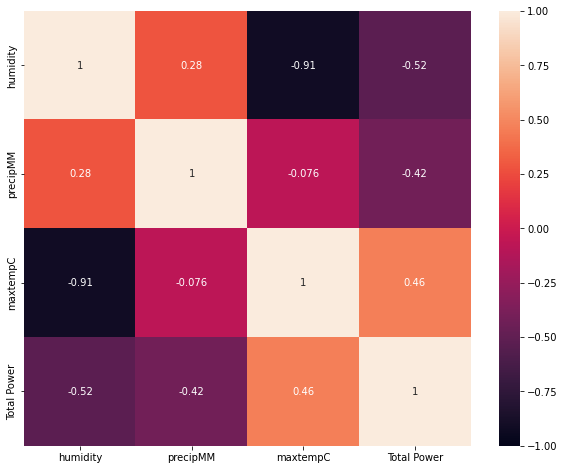

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(gurgaon_temp_ac_data.iloc[:,0:].corr(), annot=True,vmax=1, vmin=-1)
plt.show()

####Plotting all the attributes to see general trend

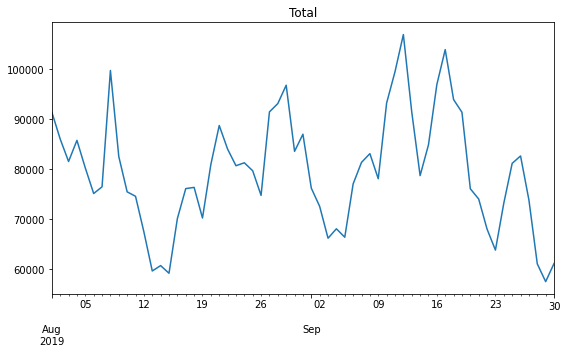

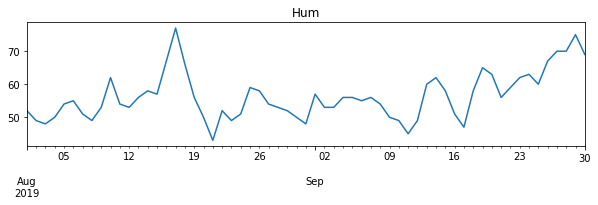

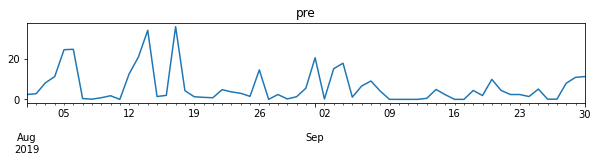

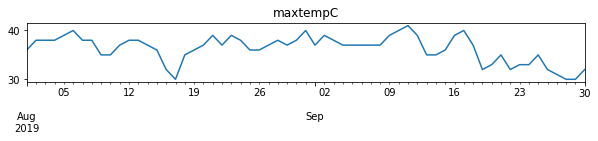

In [24]:
plt.subplot(1,1,1)
plt.title('Total')
gurgaon_temp_ac_data['Total Power'].plot(figsize=(9,5))
plt.show()

plt.subplot(2,1,1)
plt.title('Hum')
gurgaon_temp_ac_data['humidity'].plot(figsize=(10,5))
plt.show()

plt.subplot(3,1,1)
plt.title('pre')
gurgaon_temp_ac_data['precipMM'].plot(figsize=(10,5))
plt.show()

plt.subplot(4,1,1)
plt.title('maxtempC')
gurgaon_temp_ac_data['maxtempC'].plot(figsize=(10,5))
plt.show()

####Checking for seasonality and underlying trend in attributes

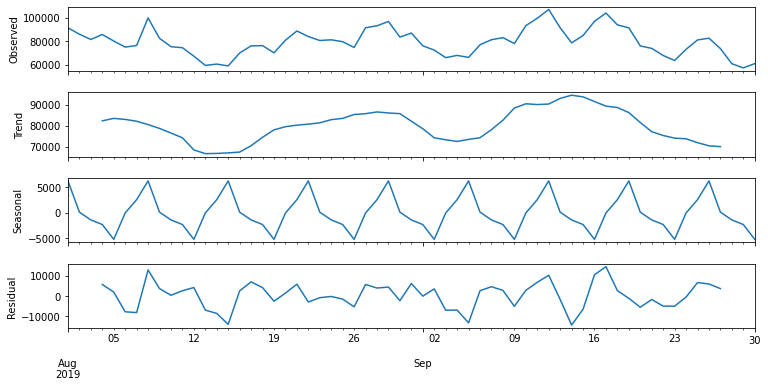

In [25]:
add_decomp_power = seasonal_decompose(gurgaon_temp_ac_data['Total Power'], model='add')
fig = add_decomp_power.plot()
fig.set_figwidth(12)
fig.set_figheight(6)
plt.show()

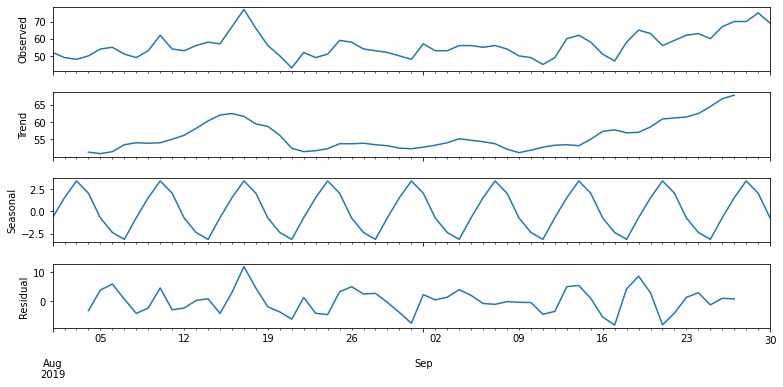

In [26]:
add_decomp_humidity = seasonal_decompose(gurgaon_temp_ac_data['humidity'], model='add')
fig = add_decomp_humidity.plot()
fig.set_figwidth(12)
fig.set_figheight(6)
plt.show()

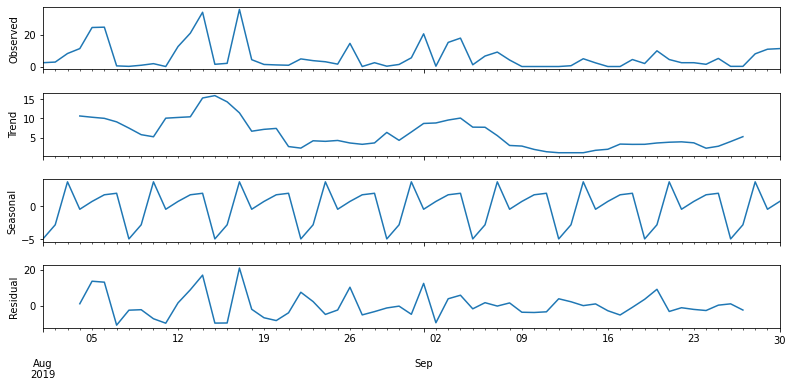

In [27]:
add_decomp_precp = seasonal_decompose(gurgaon_temp_ac_data['precipMM'], model='add')
fig = add_decomp_precp.plot()
fig.set_figwidth(12)
fig.set_figheight(6)
plt.show()

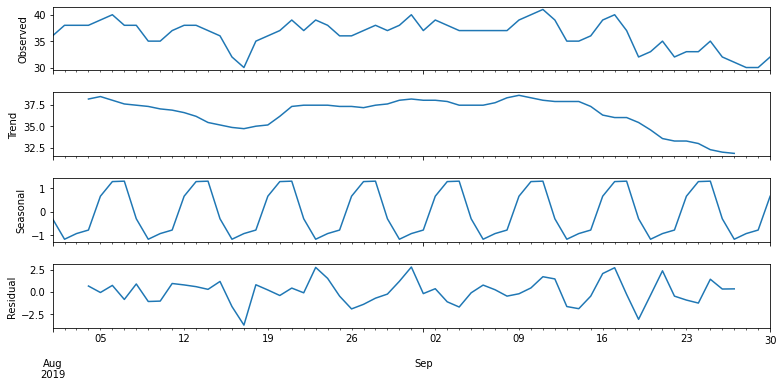

In [28]:
add_decomp_temp = seasonal_decompose(gurgaon_temp_ac_data['maxtempC'], model='add')
fig = add_decomp_temp.plot()
fig.set_figwidth(12)
fig.set_figheight(6)
plt.show()

###Performing Augmented Dickey-Fuller Test
Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not.

In [29]:
test_result=adfuller(gurgaon_temp_ac_data['Total Power'])


#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(x):
    result=adfuller(x)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [30]:
adfuller_test(gurgaon_temp_ac_data['Total Power'])

ADF Test Statistic : -2.513154807570171
p-value : 0.11230633818298913
#Lags Used : 4
Number of Observations Used : 56
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


####Adding shift to data
so that to make the data stationary for Arima and Sarimax model

In [31]:
gurgaon_temp_ac_data['Seasonal First Difference']=gurgaon_temp_ac_data['Total Power']-gurgaon_temp_ac_data['Total Power'].shift(1)

In [32]:
gurgaon_temp_ac_data.head()

,humidity,precipMM,maxtempC,Total Power,Seasonal First Difference
2019-08-01,52,2.4,36,91373.961417,NaN
2019-08-02,49,2.8,38,85977.906361,-5396.055056
2019-08-03,48,8.2,38,81477.561246,-4500.345115
2019-08-04,50,11.3,38,85715.152793,4237.591547
2019-08-05,54,24.6,39,80184.120299,-5531.032494


In [33]:
adfuller_test(gurgaon_temp_ac_data['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.98218550445589
p-value : 1.8274056405520097e-07
#Lags Used : 2
Number of Observations Used : 57
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


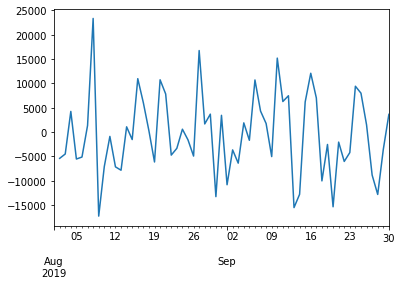

In [34]:
gurgaon_temp_ac_data['Seasonal First Difference'].plot()

###Forecasting
####ARIMA Model

In [35]:
model=ARIMA(gurgaon_temp_ac_data['Total Power'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Total Power   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -626.611
Method:                       css-mle   S.D. of innovations           8304.449
Date:                Mon, 22 Nov 2021   AIC                           1261.223
Time:                        03:37:38   BIC                           1269.600
Sample:                    08-02-2019   HQIC                          1264.500
                         - 09-30-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -515.7082   1132.521     -0.455      0.651   -2735.409    1703.993
ar.L1.D.Total Power    -0.1335      0.595     -0.225      0.823      -1.299       1.032
ma.L1.D.Total Power     0.1983      0.575      0.345      0.731      -0.929       1.326
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -7.4907           +0.0000j            7.4907            0.5000
MA.1           -5.0422           +0.0000j            5.0422            0.5000
-----------------------------------------------------------------------------
"""

####ARIMA forecast plot

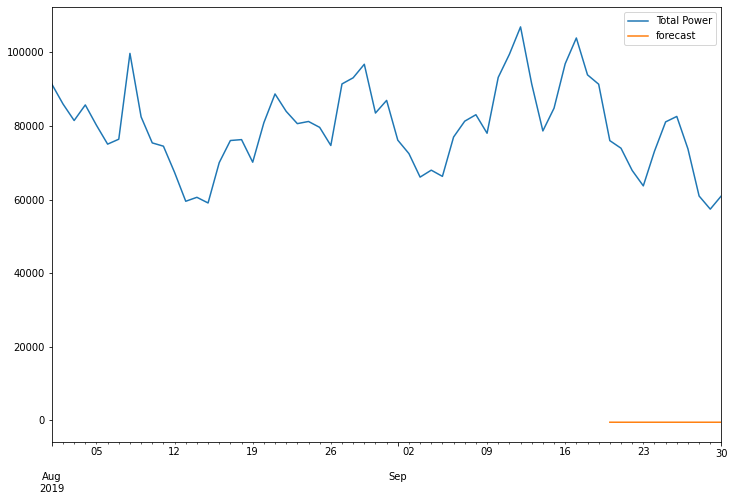

In [37]:
gurgaon_temp_ac_data['forecast']=model_fit.predict(start=50,end=60,dynamic=True)
gurgaon_temp_ac_data[['Total Power','forecast']].plot(figsize=(12,8))

####SARIMAX Model

In [38]:
model=sm.tsa.statespace.SARIMAX(gurgaon_temp_ac_data['Total Power'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


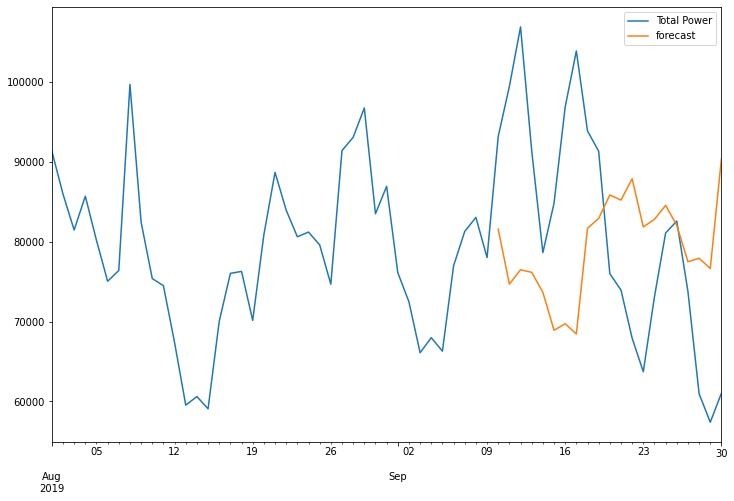

In [39]:
gurgaon_temp_ac_data['forecast']=results.predict(start=40,end=60,dynamic=True)
gurgaon_temp_ac_data[['Total Power','forecast']].plot(figsize=(12,8))

####Generating dates for future prediction

In [40]:
future_dates=[gurgaon_temp_ac_data.index[-1]+ DateOffset(days=x)for x in range(0,24)]

In [41]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=gurgaon_temp_ac_data.columns)

In [42]:
future_datest_df.tail()

,humidity,precipMM,maxtempC,Total Power,Seasonal First Difference,forecast
2019-10-19,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-20,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-21,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-22,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-23,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
future_df=pd.concat([gurgaon_temp_ac_data,future_datest_df])

####Forecasting for further dates

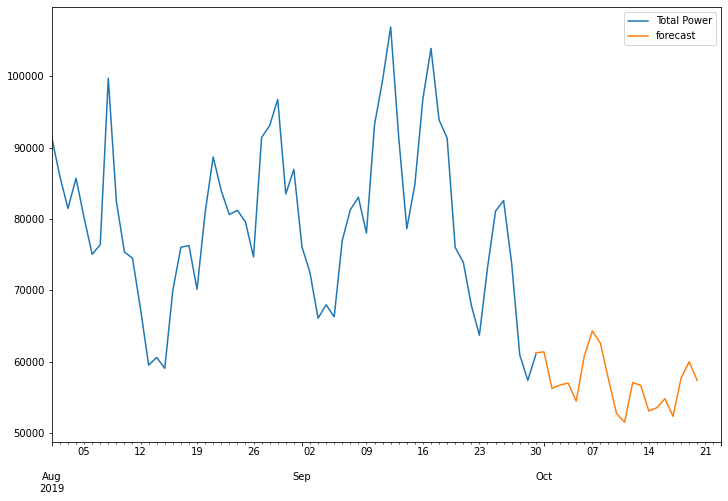

In [44]:
future_df['forecast'] = results.predict(start = 60, end = 80, dynamic= True)  
future_df[['Total Power', 'forecast']].plot(figsize=(12, 8)) 

##Summary
1. `AC18` consumes more power and `AC5` consumed minimum. (which can be due to more occupancy in rooms or the conditions or model of the AC)
2. Thurday seems to be the day with most consumption. (maybe due to more events were organized on thursday in that time frame)
3. Peak Hours are - 9 pm to 6 am


###What can be Furthur Done?
1. We can try and collect data for hotel occupancy and events and relate it with ac_data.
2. Power outage or any environmental activity in that area can also be used to relate.
3. We can also use Deep Learning models like LSTM for forecasting.
4. We can use GridSearchCV for better hyperparameter tuning.